# 4.1 선형 회귀 - 개요

### Linear Regression
- 입력 특성의 가중치 합($\theta$)과 편향(bias)라는 상수를 더해 예측을 만듦
- Linear Regression Training: 모델이 훈련 세트에 가장 잘 맞도록 <U>모델 파라미터를 설정</U>하는 것으로 RMSE, MAE와 같은 성능지표를 사용하여 모델이 훈련데이터에 얼마나 잘 들어맞는지 측정해야 함


- <u>$y$를 잘 예측할 수 있는 $\theta$를 찾는 것이 문제</u>

**선형 회귀 모델의 예측**

$ \hat y  = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $
- $\hat y$: 예측값
- $\theta_1$: 첫번째 모델 파라메터
- $x_n$: n번째 특성값

**RMSE**

$ cost(\theta) = {1\over m }\sum_{i=1}^{m} {(h_{\theta}(x^{(i)}) - y^{(i)})}^2 $

- cost 값이 낮아질 때의 $\theta$ 찾기

# 4.1 선형 회귀- 해석적 방법
## 4.1.1 정규방정식

정규방정식(normal equation): 비용 함수를 최소화하는 $\theta$값을 찾기 위한 해석적인 방법. 바로 결과를 얻을 수 있는 수학 공식

 $\hat\theta = (X^TX)^{-1}X^Ty$
 - $\hat\theta$: 비용 함수를 최소화하는 θ값.
 - $X^T$: transpose X
 - $(X^TX)^{-1}$: inverse
 - $y$: $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

### 난수 값으로 선형 데이터셋 생성하기

In [1]:
import numpy as np
X = 2 * np.random.rand(100,1)          # np.random.rand(m, n): 0~1의 균일분포 난수를 생성한 뒤 배열(m, n)으로 저장/ 100차원
y = 4 + 3*X + np.random.randn(100,1)   # np.random.rand(m, n): 평균 0, 표준편차 1의 가우시안분포난수를 생성한 뒤 배열(m, n)으로 저장

(0.0, 2.0, 0.0, 15.0)

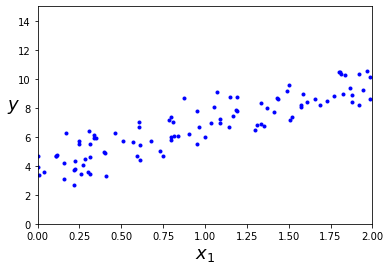

In [2]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")                           # b:blue , .:dot
plt.xlabel("$x_1$", fontsize=18)               # $:기울임꼴
plt.ylabel("$y$", rotation=0, fontsize=18)     
plt.axis([0, 2, 0, 15])                        # plt.axis([x_min, x_max, y_min, y_max]): 그래프 출력 범위 지정

⬆ 무작위로 생성한 선형 데이터셋

### 정규 방정식 확인하기
$\hat\theta = (X^TX)^{-1}X^Ty$
 - $\hat\theta$: 비용 함수를 최소화하는 θ값.
 - $X^T$: transpose X
 - $(X^TX)^{-1}$: inverse
 - $y$: $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

In [3]:
## 정규방정식을 사용해 $\hat\theta$ 계산
#np.c_[a,b]: 1차원 배열 a, b를 세로로 붙여서 2차원 배열 생성하기. 모든 샘플에 x0=1추가
X_b = np.c_[np.ones((100,1)), X]

#np.linalg: numpy 선형대수 모듈
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)     #np.linalg.inv(x): 역행렬 계산,  np.dot(x): 행렬 간 내적곱

In [4]:
theta_best

array([[3.90638667],
       [2.95471689]])

- 기댓값: [[4],[3]]
- 노이즈 때문에 함수의 파라미터를 정확하게 재현하지 못하였음

### 선형회귀 예측 결과 구현하기 
$ \hat y = X\hat\theta$

In [9]:
## $\hat\theta$을 사용한 예측
X_new = np.array([[0],[2]])

#np.c_[a,b]: 1차원 배열 a, b를 세로로 붙여서 2차원 배열 생성하기. 모든 샘플에 x0=1추가
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.90638667],
       [9.81582046]])

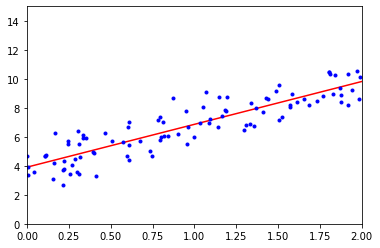

In [10]:
plt.plot(X_new, y_predict, "r-")     # r:red , -:line     
plt.plot(X, y, "b.")                 # b:blue , .:dot      
plt.axis([0, 2, 0, 15])              # plt.axis([x_min, x_max, y_min, y_max]): 그래프 출력 범위 지정
plt.show()

### 사이킷런으로 선형회귀 예측 결과 구현하기

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()        #LinearRegression() 클래스 호출
lin_reg.fit(X, y)                   #.fit(x, y): 데이터 이용해 모델 생성
lin_reg.intercept_, lin_reg.coef_   #.intercept_: 실수값 1개,   .coef: numpy배열

(array([3.90638667]), array([[2.95471689]]))

In [12]:
X_new = np.array([[0], [2]])

lin_reg.predict(X_new)    #.predict(x): 모델 예측

array([[3.90638667],
       [9.81582046]])

# 4.2 선형회귀 - 경사 하강법

$ cost(\theta) = {1\over m }\sum_{i=1}^{m} {(h_{\theta}(x^{(i)}) - y^{(i)})}^2 $
- 경사 하강법(GD:Gradient Descent Method)
 - 비용함수(cost function)을 최소화하기 위해 반복해서 파라메터를 조정하는 최적화 방법
 - 파라메터 벡터 $theta$에 대해 비용함수의 현재 기울기(gradient)를 계산하고, 기울기가 감소하는 방향으로 진행
 - 무작위 초기화(random initailization): $\theta$를 임의의 값으로 시작해서 한번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최소값에 수렴할 때까지 점진적으로 향상시킴 (=> 학습 스텝 크기는 비용함수의 기울기에 비례, 파라미터가 최솟값에 가까워질수록 스텝 크기가 점진적으로 줄어듦)
 - 학습률(learning rate) $\alpha$: 한번 학습하는 스텝의 크기. 학습률이 너무 작으면 알고리즘이 수렴하기 위해 반복을 많이 진행해야하므로 시간이 오래 걸림
-----
- 배치 경사 하강법(BGD: Batch Gradient Descent Method)
 - 전체 학습 데이터를 하나의 배치로 묶어 학습시키는 방법
 - 전체 데이터에 대한 모델의 오차의 평균을 구한 다음, 이를 이용하여 미분을 통해 경사를 산출, 최적화를 진행함
 - 전체 데이터를 통해 학습시키기 때문에 가장 업데이트 횟수가 적음
 - 전체 데이터를 모두 한 번에 처리하기 때문에 메모리가 가장 많이 필요
 - 항상 같은 데이터에 대해 경사를 구하기 때문에 수렴이 안정적

## 4.2.1 배치 경사 하강법
### 배치 경사 하강법을 사용한 선형회귀 예측 결과 구현하기

비용 함수의 그레이디언트 벡터

$ {{\partial}\over{\partial \theta_j}}{MSE}({\theta}) = {2 \over m}X^T(X{\theta} - y)$

경사 하강법의 스텝

$ \theta^{(next step)} = \theta - \eta {{\partial}\over{\partial \theta}}MSE({\theta})$
- $\eta$ : 학습률

In [13]:
eta = 0.1              #학습률
n_iterations = 1000    #반복 횟수
m = 100                #샘플 수

theta = np.random.randn(2,1)    # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    
theta

array([[3.90638667],
       [2.95471689]])

# 4.3 다항 회귀
- 비선형 데이터를 학습하기 위해 선형 모델을 사용
- 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형모델을 훈련시킴

### 2차 방정식으로 비선형 데이터 생성하기

2차 방정식의 형식: $ y = ax^2 +bx + c $

In [14]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

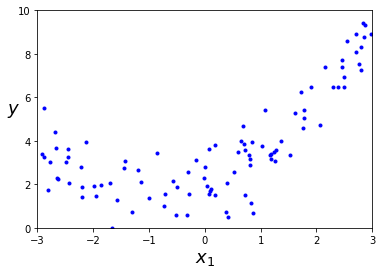

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

### 확장된 훈련 데이터에 선형회귀 적용하기

In [16]:
from sklearn.preprocessing import PolynomialFeatures

#PolynominalFeatures(): 훈련 세트(X)에 있는 각 특성을 제곱(degree=2)하여 새로운 훈련 데이터셋(X_poly)으로 만듦
#include_bias = True 라면 편향을 위한 특성(X_0)인 1이 추가됨
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X_poly는 이제 원래 특성 X와 이 특성의 제곱을 포함함.<br>
⬇ 확장된 훈련 데이터에 LinearRegression 적용

In [17]:
lin_reg = LinearRegression()           #LinearRegression() 클래스 호출
lin_reg.fit(X_poly, y)                 #.fit(x, y): 데이터 이용해 모델 생성
lin_reg.intercept_, lin_reg.coef_      #.intercept_: 실수값 1개,     .coef_:numpy 배열

(array([2.00292769]), array([[0.96086447, 0.4938841 ]]))

- 실제 함수: $ y = 0.5x_1^2 + 1.0x_1 + 2.0 + \alpha $
- 예측 모델: $ y = 0.49x_1^2 + 0.96x_1 + 2.00 $

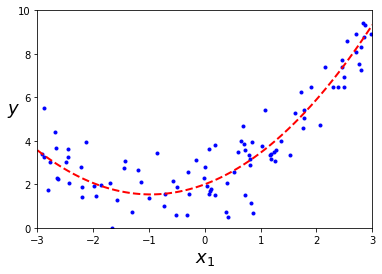

In [18]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r--", linewidth=2)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$",rotation = 0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# 4.4 학습 곡선

### 모델의 일반화 성능 추정(1): 단순 선형 회귀 모델(직선)의 학습 곡선 그리기

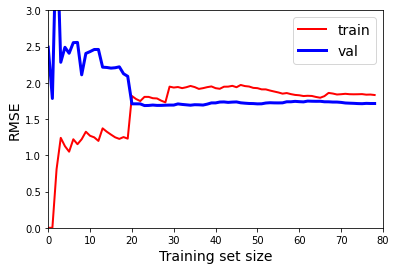

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # validation set 20%
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)     #데이터셋 분류
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

과소적합(underfitting) 발생: 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음

훈련 데이터의 성능
- 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동
- 하지만 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽이 학습하는 것이 불가능
- 그래서 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승

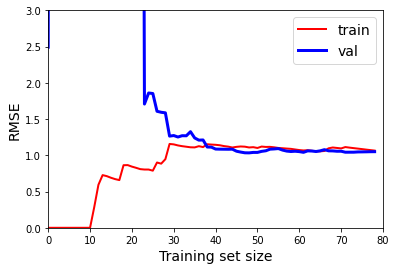

In [48]:
from sklearn.pipeline import Pipeline

#PolynominalFeatures(): 훈련세트(X)에 있는 각 특성을 10제곱(degree=10)하여 새로운 훈련 데이터셋(X_poly)으로 만듦
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=True)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

<del>오..책대로라면 overfitting 발생이여야 하는데 아직도 리를빗 underfitting인걸..?</del>

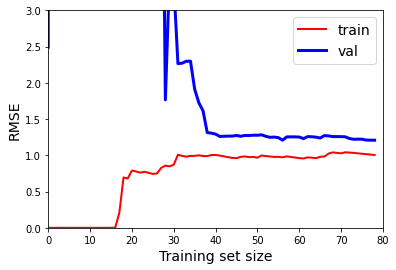

In [49]:
from sklearn.pipeline import Pipeline

#PolynominalFeatures(): 훈련세트(X)에 있는 각 특성을 15제곱(degree=15)하여 새로운 훈련 데이터셋(X_poly)으로 만듦
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=15, include_bias=True)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

<del>오...15차항은 좀 낫네..</del>

과대적합(Overfitting) 발생
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 곡선 사이에 공간이 있음/ 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻(과대적합 모델의 특징). 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워 짐.

# 4.5 규제가 있는 선형 모델
## 4.5.1 릿지 회귀

릿지 회귀(티호노프 규제, Tihonov constraint)
- 학습 알고리즘을 데이터에 맞추는 것 뿐 아니라 <u>모델의 가중치가 가능한 작게 유지되도록 노력</u>
 - 규제항은 훈련하는 동안에만 비용 함수에 추가됨
 - 모델이 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표료 평가함
- 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 데이터 스케일을 맞추는 것이 중요함

**릿지 회귀의 비용 함수**

$ J(\theta) = MSE(\theta) + \alpha{1 \over 2}{\sum_{i=1}^{n}\theta_i^2} $ 
- $\alpha$: 모델을 많이 규제할지 조절
- 편향 $\theta_0$: 규제되지 않음($i=1$부터 시작함)

### 릿지 회귀: 규제(L2 norm)가 추가된 선형 회귀

In [51]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")     #solver="cholesky": 숄레스키 행렬 분해
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])                        #기댓값 = 1.5

array([[5.01577387]])

## 4.5.2 라쏘 회귀

라쏘 회귀(Least Absolute Shrinkrage and Selection Operator)
- 릿지 회귀처럼 비용 함수에 규제항을 더하지만 가중치 벡터의 L1 norm을 사용함
- 덜 중요한 특성의 가중치를 제거하려고 함
- 자동으로 특성 선택을 하고 최소 모델(Sparse model)을 만듦
- 0이 아닌 특성의 가중치가 적음

**라쏘 회귀의 비용함수**

$ J(\theta) = MSE(\theta) + \alpha{\sum_{i=1}^{n}\begin{vmatrix}{\theta_i}\end{vmatrix}} $ 
- $\alpha$: 모델을 많이 규제할지 조절
- 편향 $\theta_0$: 규제되지 않음($i=1$부터 시작함)

### 라쏘 회귀: 규제(L1 norm)가 추가된 선형 회귀

In [53]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.97743752])

## 4.5.3 엘라스틱넷


$ J(\theta) = MSE(\theta) + r\alpha{\sum_{i=1}^{n}\begin{vmatrix}{\theta_i}\end{vmatrix}} + {1-r \over 2}\alpha{\sum_{i=1}^{n}}\theta_i^2$ 
- 규제항: 릿지와 회귀의 규제항을 단순히 더해서 사용
- 혼합 정도는 혼합 비율 r을 사용하여 조절

**엘라스틱넷 > 라쏘회귀 > 릿지회귀**
- 릿지가 기본이 되지만 쓰이는 특성이 몇 개 뿐이라고 의심되면 라쏘나 엘라스틱넷이 좋음
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을때는 라쏘보다 엘라스틱넷을 선호함

### 릿지 회귀와 라쏘 회귀를 절충한 모델, 혼합 비율 r로 정도 조절

In [55]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)    #l1_ratio: 혼합 비율
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

#l1_ratio = 0: 릿지 회귀(L2규제)만 사용
#l2_ratio = 1: 라쏘 회귀(L1규제)만 사용
# 0 < l1_ratio < 1 :혼합 사용

array([4.97919096])

# 4.6 로지스틱 회귀
샘플이 특정 클래스에 속할 확률을 추정하는데 사용
- 이진 분류기: 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측함

## 4.6.1. 확률 추정
- 입력 특성의 가중치 합에 편향을 더하는 것은 선형 회귀와 동일하나 결과값을 로지스틱을 출력하는 것이 다름

**로지스틱 회귀 모델의 확률 추정(벡터 표현식)**

$ p\hat = h_{\theta}(x) = \sigma(\theta^T \cdot x) $

**로지스틱 함수**

$\sigma(t) = {1 \over 1+exp^{-t}}$

**로지스틱 회귀모델 예측**

$ \hat{y} = \begin{cases} 0& \hat{p} < 0.5일때 \\ 1& \hat{p} \ge 0.5일때 \end{cases} $

## 4.6.2 훈련과 비용 함수
- 훈련의 목적: 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고 음성 샘플(y=0)에 대해서는 낮은 확률은 추정하는 모델 파라미터 벡터 $\theta$를 찾는 것

**하나의 훈련 샘플에 대한 비용 함수**

$ c(\theta) = \begin{cases} -log(\hat{p})& y = 1일 때  \\ -log(1-{\hat{p}})& y = 0일 때 \end{cases} $
- $t$가 $0$에 가까워지면 $-log(t)$가 매우 커지므로 타당하다 할 수 있음: 모델이 양성 샘플을 0에 가까운 모델로 추정하면 비용이 크게 증가할 것
- $t$가 $1$에 가까워지면 $-log(t)$는 0에 가까워짐: 음성 샘플의 확률을 0에 가깝게 추정하거나 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워질 것임.

**로지스틱 회귀의 비용 함수(로그 손실)**

$ J(\theta) = -{1 \over m}{\sum_{i=1}^{m}} [ y^{(i)}log(\hat{p}^{(i)}) + (1-y^{(i)})log(1-\hat{p}^{(i)})    ] $

- 최솟값을 계산하는 알려진 해 없음
- 하지만 볼록함수이므로 경사하강법이 전역 최솟값을 찾는 것을 보장

**로지스틱 비용함수의 편도함수**
<br>로지스틱 회귀의 비용함수의 j번째 모델 파라미터 $\theta_j$에 대해 편미분

$ {\partial \over \partial\theta_j}J(\theta) = {1 \over m}{\sum_{i=1}^{m}}(\sigma(\theta^Tx^{(i)})-y^{(i)})x_j^{(i)} $

- 각 샘플에 대해 예측 오차를 계산하고 j번째 특성값을 곱해서 모든 훈련 샘플에 대해 평균을 냄
- 모든 편도함수를 포함한 그레이디언트 벡트를 만들면 배치 경사 하강법 알고리즘을 사용할 수 있음

## 4.6.3 결정 경계
### 데이터 로드

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [59]:
X = iris["data"][:, 3:]                       #data 정보 중 꽃잎 넓이만 별도로 X에 저장
y = (iris["target"] == 2).astype(np.int)      #iris virginica이면 1 아니면 0으로 분류

<ipython-input-59-52d83a40d4e8>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)      #iris virginica이면 1 아니면 0으로 분류


### 로지스틱 회귀 모델 훈련

In [60]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

### 꽃잎의 너비가 0~3cm인 꽃에 대한 모델 추정 확률 계산

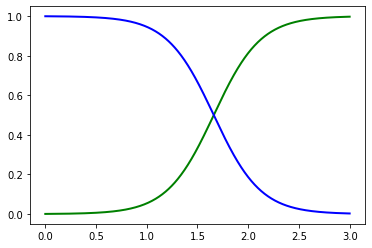

In [61]:
#np.linspace(x, y, z): x~y범위의 균일한 점 z개로 구성된 벡터 생성,    reshape(-1, 1): 열 1개로 구성된 배열로 변경
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b-", linewidth=2, label="Not lris virginaca")

## 4.6.4 소프트맥스 회귀
로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있음

**클래스 k에 대한 소프트맥스 점수**

$ s_k(x) = (\theta^{(k)})^Tx $

- 각 클래스는 자신만의 파라미터 백터 $\theta^{(k)}$가 있음
- 이 벡터들은 <u>파라미터 행렬</u> $\Theta$에 행으로 저장됨

**소프트맥스 함수**

$ \hat{p}_k = \sigma(s(X))_k = { exp(s_k(X)) \over {\sum_{j=1}^{k}}exp(s_j(X))  } $

- $k$: 클래스 수
- $s(X)$: 샘플 $x$에 대한 각 클래스의 점수를 담은 벡터 
- $ \sigma(s(X))_k$: 샘플 $x$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 $k$에 속할 추정 확률


- 샘플 $x$에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 $k$에 속할 확률 $\hat{p}_k$를 추정할 수 있음
- 이 함수는 각 점수에 지수 함수를 적용한 후 정규화함

In [63]:
X = iris["data"][:, (2,3)]    #data 정보 중 꽃잎 길이, 꽃잎 너비만 별도로 X에 저장
y = iris["target"]

#multinomial: 다항 클래스,   C: L2 구제 위한 cost function
softmax_reg = LogisticRegression(multi_class="multinomial", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

parameter C를 조절하여 Over/Underfitting 문제를 해결
- C(cost function) 값이 클 경우: 약한 규제
- C 값이 작을 경우: 강한 규제

In [64]:
softmax_reg.predict([[5, 2]])

array([2])

In [65]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])